## Dependencies and Data

Here as the manually selected features code we import all the required dependencies and also load the dataset. 
But unlike previously i'm not manually selecting the features instead i allow the Recursive Feature Elimination(RFE) algorithm to eliminate the least important features and keep the rest to train the model.

The RFE algorithm only works with SVC with linear kernel and works all the time for support vector regression(SVR).


In [8]:
%matplotlib notebook
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn.neural_network import MLPClassifier   #Multi-Layer Perceptron Classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt     
from prettytable import from_csv    #To draw tables

dataset=pd.read_csv('heart-disease-data.csv')

print(dataset.head(5))     #prints first 5 values for all columns

array=dataset.values
data=array[:,0:13]
labels=array[:,13]
#model1=MLPClassifier(activation='relu',solver='lbfgs',alpha=1e-5,random_state=1,) #doesnot work with neural networks
model2=SVC(kernel='linear')    
model3=LogisticRegression()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


## Feature reduction using RFE

The Recursive Feature Elimination(RFE) algorithm is implemented using the sklearn in-built method for RFE :- RFE(model,number of features required)


The RFE method does not seem to work with the neural network model, so i eliminnate the MLPClassifer model.

In [9]:
from sklearn.feature_selection import RFE
#rfe1=RFE(model1,6)  
rfe2=RFE(model2,6)    #here we wish to keep 6 most important features
rfe3=RFE(model3,6)

## Splitting the data into train data and test data

In [14]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=4)

## Fitting the data and finding the ranked features

Here since we have reduced the feature from the original dataset, we have to fit the rfe values not to the main model.

First, we will try for the SVC classifier.

In [15]:
#k1=rfe1.fit(data,labels)
k2=rfe2.fit(x_train,y_train)
print("Num Features: ",k2.n_features_)
print("Selected Features: ",k2.support_)
print("Feature Ranking: ",k2.ranking_)


Num Features:  6
Selected Features:  [False  True  True False False False False False  True  True False  True
  True]
Feature Ranking:  [7 1 1 5 8 4 3 6 1 1 2 1 1]


Here we can see the features with 'True' value in 'Selected Features' or have '1' in corresponding index place are the 6 most preffered features for SVC model.

Here the positions(considering first index value to be 0) 1,2,8,9,11,12 are said to be the most important features.

The corresponding data are "sex","cp","exang","oldpeak","ca","thal".

These data are said to be give the best results for our data classification.

In [16]:
k3=rfe3.fit(x_train,y_train)
print("Num Features: ",k3.n_features_)
print("Selected Features: ",k3.support_)
print("Feature Ranking: ",k3.ranking_)

Num Features:  6
Selected Features:  [False  True  True False False False False False  True  True  True  True
 False]
Feature Ranking:  [7 1 1 6 8 5 2 4 1 1 1 1 3]


Here, for the Logistic regression model, the selected features are in the index position 1,2,8,9,10,11

The corresponding data being "sex","cp","exang","oldpeak","slope","ca".


## Accuracy for test data

In [18]:
p2=k2.predict(x_test)
print("Accuracy of the SVC model on unseen data is "+str(accuracy_score(p2,y_test)*100)+" %")

Accuracy of the SVC model on unseen data is 83.60655737704919 %


As we can see the accuracy of the SVC model has imporved. 

The manually selected features with the same linear kernel gave SVC a test data accuracy of 81.9672131147541 %.

In [21]:
p3=k3.predict(x_test)
print("Accuracy of the SVC model on unseen data is "+str(accuracy_score(p3,y_test)*100)+" %")

Accuracy of the SVC model on unseen data is 83.60655737704919 %


Here we can see the accuracy of the Logistic regression model has reduced after using the feature elimination technique.

The accuracy with manually selected features was 90.1639344262295 %.

This means that feature selection RFE algorithm works best on SVC of the three selected algorithms( MLP,SVC and Logistic Regression) having said that RFE technique doesnot work on MLP. 

## Confusion matrix for SVC and Logisitic Regression after RFE

<IPython.core.display.Javascript object>


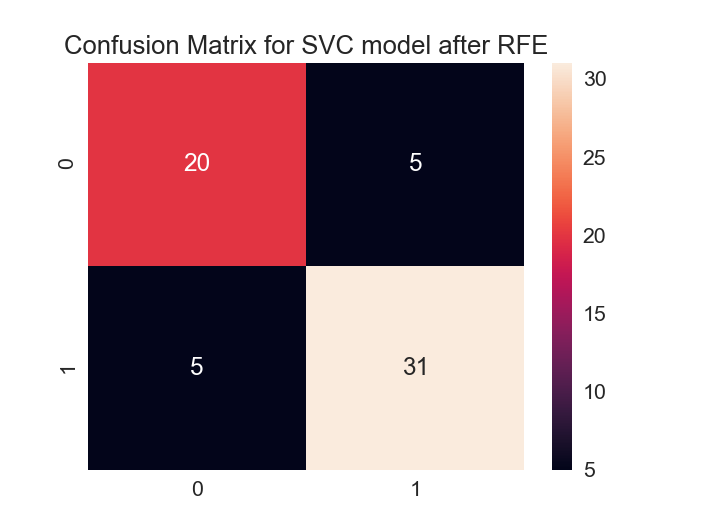

<IPython.core.display.Javascript object>


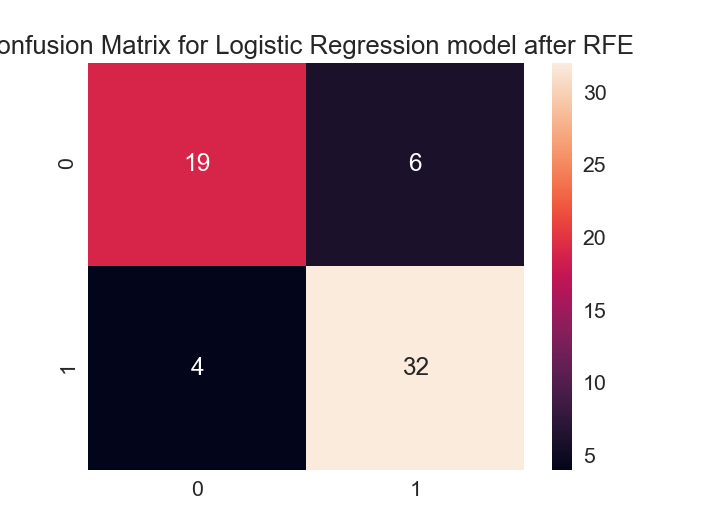

In [23]:
cm1=confusion_matrix(y_test,p2)
cm2=confusion_matrix(y_test,p3)

plt.figure()
plt.title("Confusion Matrix for SVC model after RFE")
df_cm = pd.DataFrame(cm, range(2),range(2))
sn.set(font_scale=1.4)     #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}) # font size

plt.figure()
plt.title("Confusion Matrix for Logistic Regression model after RFE")
df_cm = pd.DataFrame(cm2, range(2),range(2))
sn.set(font_scale=1.4)     #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}) # font size

Do compare it with the confusion matrices of SVC and Logistic Regression without RFE.